Assignment Start

In [ ]:
import sys
sys.path.insert(1, '../src')
import os

from utils import *

imgs, labels = load_imgs('../data/Dataset', ['CHEETAH' ,'OCELOT', 'SNOW LEOPARD', 'CARACAL', 'LIONS', 'PUMA', 'TIGER'])
x, y = make_dataset(imgs, labels, label_to_idx, (224,224))
print('x shape: {}, y shape:{}'.format(x.shape, y.shape))
plot_sample(imgs, labels, 5, 5, resize=(224, 224))

Process dataset done!
X_train.shape: (1357, 150528)
X_val.shape: (170, 150528)
X_test.shape: (170, 150528)
Image size (vectorized): 150528
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               77070848  
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 7)                 3591      
                                                                 
Total params: 77,337,095
Trainable params: 77,337,095
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
43/43 [==============================] - 4s 39ms/step - loss: 39.9764 - accuracy: 0.1710 - val_loss: 12.1919 - val_accuracy: 0.1118
Epoch 2/100
43/43 [======

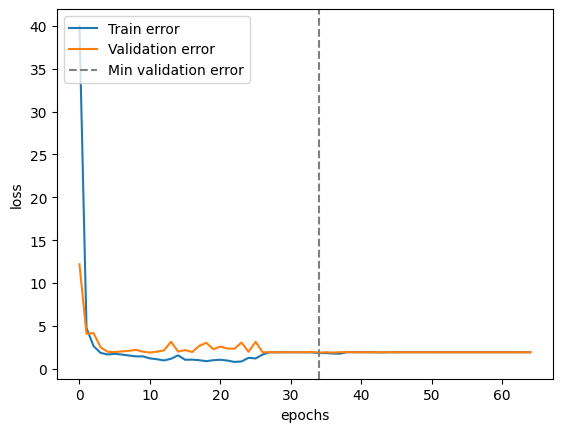

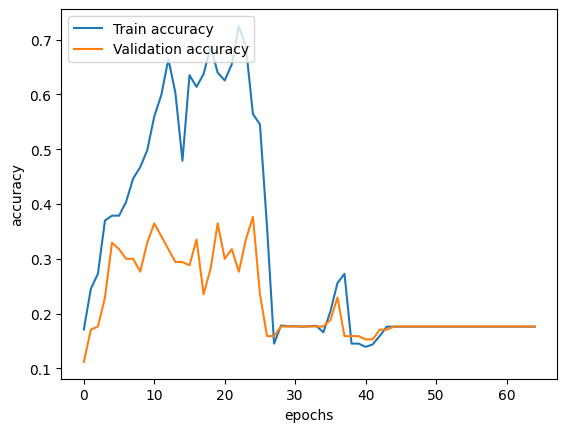

6/6 [==============================] - 0s 9ms/step - loss: 1.8694 - accuracy: 0.1765
Test loss: 1.8694117069244385, Test accuracy: 0.1764705926179886
6/6 [==============================] - 0s 7ms/step


In [3]:
################### Task 1 ###################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras import Sequential, optimizers, layers, callbacks
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed(0)
keras.utils.set_random_seed(0)

def t1model(shape, classes, downscale=1):
    model = Sequential()
    model.add(Dense(512//downscale, activation='relu', input_shape=shape))
    model.add(Dense(512//downscale, activation='relu'))
    # Adds softmax output layer for multi-class classification
    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    return model

#### Process dataset
## 2. Normalize each pixel of each channel so that the range is [0,1]
X = x / 255.0

## 3. Flatten the images using tf.reshape
X_flat = X.reshape(X.shape[0], -1)

## Split the dataset into train, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, y, train_size=0.8, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

print("Process dataset done!")
print('X_train.shape: {}'.format(X_train.shape))
print('X_val.shape: {}'.format(X_val.shape))
print('X_test.shape: {}'.format(X_test.shape))
print("Image size (vectorized): {}".format(X_train.shape[1]))
####


## 4. Build a fully connected neural network
t1model = t1model(X_flat.shape[1:], y.shape[1], downscale=1)
t1model.summary()

# 5. Train the model and plot training and validation accuracies
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
history = t1model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])


# Plot training and validation errors
plt.figure()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Train error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.axvline(np.argmin(history.history['val_loss']), linestyle='--', color='gray', label='Min validation error')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T1.model_loss.png')
plt.show()

# Plot training and validation accuracies
plt.figure()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T1.model_accuracy.png')
plt.show()


# 6. Assess the performance of the model on test set
loss, acc = t1model.evaluate(X_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(loss, acc))

y_pred = t1model.predict(X_test)
y_pred = np.round(y_pred)


# t1model.save('/content/drive/MyDrive/HW2/T1_model.h5')
# f = open("/content/drive/MyDrive/HW2/out/T1.model_test_loss.tex", "w")
# f.write(f"{loss:.5f}")
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T1.model_test_accuracy.tex", "w")
# f.write(f"{acc:.5f}")
# f.close()

features.shape=(1697, 425)
Process dataset done!
X_train.shape: (1357, 425)
X_val.shape: (170, 425)
X_test.shape: (170, 425)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               218112    
                                                                 
 dense_4 (Dense)             (None, 212)               108756    
                                                                 
 dense_5 (Dense)             (None, 212)               45156     
                                                                 
 dense_6 (Dense)             (None, 7)                 1491      
                                                                 
Total params: 373,515
Trainable params: 373,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
43/43 [==============================] - 2s

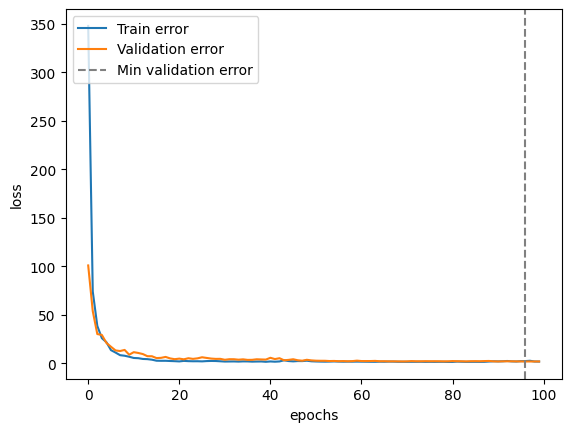

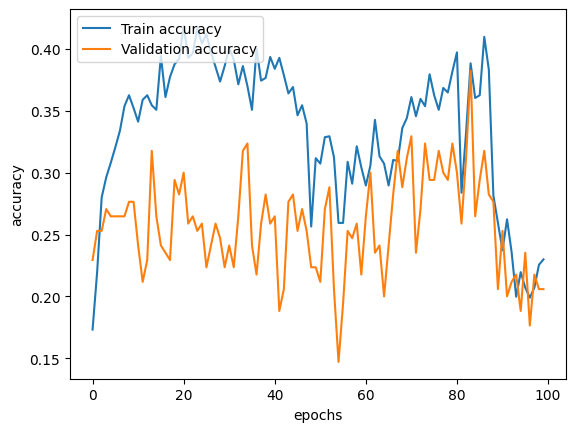

6/6 [==============================] - 0s 3ms/step - loss: 2.0428 - accuracy: 0.2000
Test loss: 2.042821168899536, Test accuracy: 0.20000000298023224


In [4]:
################### Task 1 Bonus ###################
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential, optimizers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)
keras.utils.set_random_seed(0)

def t1model(shape, classes, downscale=1):
    model = Sequential()
    model.add(Dense(512//downscale, activation='relu', input_shape=shape))
    model.add(Dense(212//downscale, activation='relu'))
    model.add(Dense(212//downscale, activation='relu'))
    # Adds softmax output layer for multi-class classification
    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    return model

## Process dataset
# Normalize each pixel of each channel so that the range is [0,1]
X = x / 255.0
##

## Extract image features
# Mean and variance over the whole image
feat_img_mean = np.mean(X, axis=(1,2,3)).reshape(-1,1)
feat_img_var = np.var(X, axis=(1,2,3)).reshape(-1,1)
# mean and variance for each channel
feat_ch_mean = np.mean(X, axis=(1,2))
feat_ch_var = np.var(X, axis=(1,2))
# max and min over the whole image
feat_img_max = np.max(X, axis=(1,2,3)).reshape(-1,1)
feat_img_min = np.min(X, axis=(1,2,3)).reshape(-1,1)
# max and min over each channel
feat_ch_max = np.max(X, axis=(1,2))
feat_ch_min = np.min(X, axis=(1,2))

# Ratios
feat_ratio_ch_max_1 = (feat_ch_max[:,0] / feat_ch_max[:,1]).reshape(-1,1)
feat_ratio_ch_max_2 = (feat_ch_max[:,0] / feat_ch_max[:,2]).reshape(-1,1)
feat_ratio_ch_max_3 = (feat_ch_max[:,1] / feat_ch_max[:,2]).reshape(-1,1)
 
feat_ratio_ch_mean_1 = (feat_ch_mean[:,0] / feat_ch_mean[:,1]).reshape(-1,1)
feat_ratio_ch_mean_2 = (feat_ch_mean[:,0] / feat_ch_mean[:,2]).reshape(-1,1)
feat_ratio_ch_mean_3 = (feat_ch_mean[:,1] / feat_ch_mean[:,2]).reshape(-1,1)

feat_ratio_ch_var_1 = (feat_ch_var[:,0] / feat_ch_var[:,1]).reshape(-1,1)
feat_ratio_ch_var_2 = (feat_ch_var[:,0] / feat_ch_var[:,2]).reshape(-1,1)
feat_ratio_ch_var_3 = (feat_ch_var[:,1] / feat_ch_var[:,2]).reshape(-1,1)

# Image histograms
feat_img_hist = np.array([np.histogram(img, bins=100, range=(0,1))[0] for img in X])
feat_ch_hist_1 = np.array([np.histogram(img[:,:,0], bins=100, range=(0,1))[0] for img in X])
feat_ch_hist_2 = np.array([np.histogram(img[:,:,1], bins=100, range=(0,1))[0] for img in X])
feat_ch_hist_3 = np.array([np.histogram(img[:,:,2], bins=100, range=(0,1))[0] for img in X])


features = np.concatenate((feat_img_mean, feat_img_var, feat_img_max, feat_img_min, \
                            feat_ch_mean, feat_ch_mean, feat_ch_max, feat_ch_min, 
                            feat_ratio_ch_max_1, feat_ratio_ch_max_2, feat_ratio_ch_max_3, \
                            feat_ratio_ch_mean_1, feat_ratio_ch_mean_2, feat_ratio_ch_mean_3, \
                            feat_ratio_ch_var_1, feat_ratio_ch_var_2, feat_ratio_ch_var_3, \
                            feat_img_hist, feat_ch_hist_1, feat_ch_hist_2, feat_ch_hist_3), axis=1)
print('features.shape={}'.format(features.shape))
##

## Split the new dataset into training, validation and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, train_size=0.8, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, shuffle=True)

print("Process dataset done!")
print('X_train.shape: {}'.format(X_train.shape))
print('X_val.shape: {}'.format(X_val.shape))
print('X_test.shape: {}'.format(X_test.shape))
##

## Train the model
T1_model_BONUS = t1model(X_train.shape[1:], y.shape[1], downscale=1)
T1_model_BONUS.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
history = T1_model_BONUS.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])
#

# Plot training and validation errors
plt.figure()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Train error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.axvline(np.argmin(history.history['val_loss']), linestyle='--', color='gray', label='Min validation error')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T1-BONUS.model_loss.png')
plt.show()

# Plot training and validation accuracies
plt.figure()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T1-BONUS.model_accuracy.png')
plt.show()

## Evaluate the model
loss, acc = T1_model_BONUS.evaluate(X_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(loss, acc))

# T1_model_BONUS.save('/content/drive/MyDrive/HW2/T1-BONUS_model.h5')
# f = open("/content/drive/MyDrive/HW2/out/T1-BONUS.model_test_loss.tex", "w")
# f.write(f"{loss:.5f}")
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T1-BONUS.model_test_accuracy.tex", "w")
# f.write(f"{acc:.5f}")
# f.close()

Process dataset done!
X_train.shape: (1357, 224, 224, 3)
X_val.shape: (170, 224, 224, 3)
X_test.shape: (170, 224, 224, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 180)     5040      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 180)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 164)       265844    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 164)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 164)       242228   

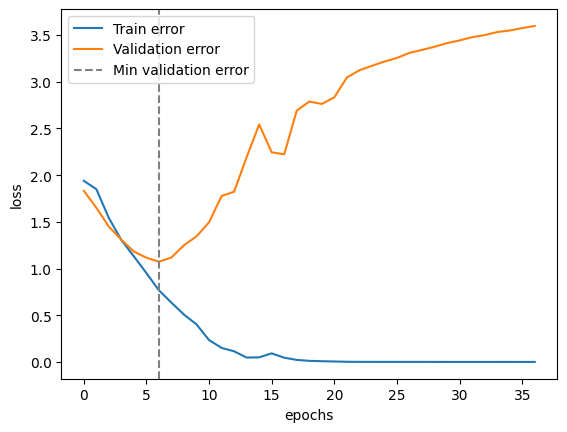

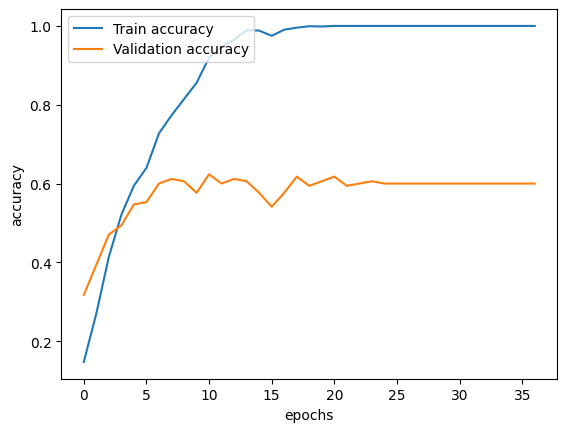

6/6 [==============================] - 0s 14ms/step - loss: 0.9358 - accuracy: 0.6235
Test loss: 0.9358256459236145, Test accuracy: 0.6235294342041016
Epoch 1/500
84/84 [==============================] - 18s 180ms/step - loss: 1.9476 - accuracy: 0.1827 - val_loss: 1.7977 - val_accuracy: 0.3294
Epoch 2/500
84/84 [==============================] - 14s 164ms/step - loss: 1.7090 - accuracy: 0.3117 - val_loss: 1.4839 - val_accuracy: 0.3647
Epoch 3/500
84/84 [==============================] - 14s 166ms/step - loss: 1.5123 - accuracy: 0.3990 - val_loss: 1.3872 - val_accuracy: 0.4118
Epoch 4/500
84/84 [==============================] - 14s 164ms/step - loss: 1.3573 - accuracy: 0.4750 - val_loss: 1.1893 - val_accuracy: 0.5176
Epoch 5/500
84/84 [==============================] - 14s 165ms/step - loss: 1.2453 - accuracy: 0.5168 - val_loss: 1.2255 - val_accuracy: 0.5412
Epoch 6/500
84/84 [==============================] - 14s 163ms/step - loss: 1.1655 - accuracy: 0.5593 - val_loss: 1.3044 - val_ac

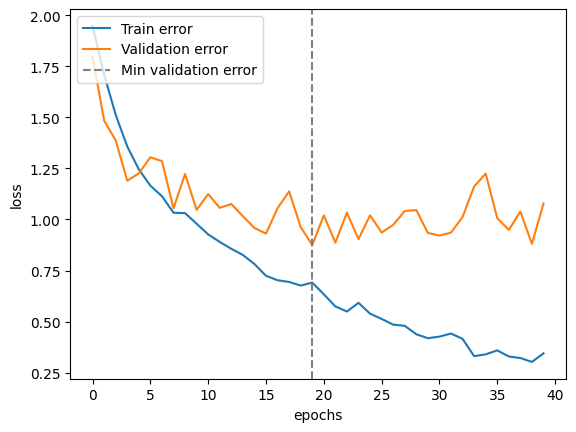

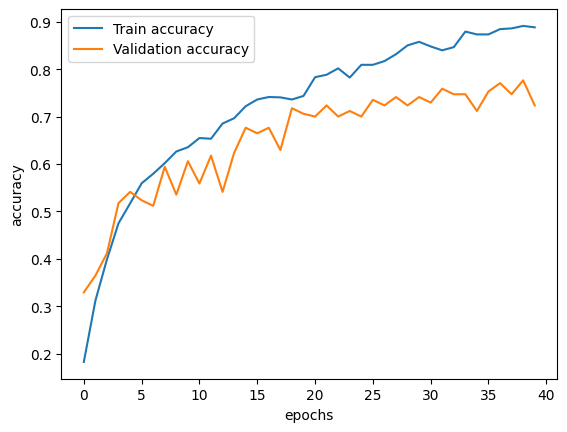

6/6 [==============================] - 0s 14ms/step - loss: 0.7783 - accuracy: 0.7471
Test loss: 0.7783479690551758, Test accuracy: 0.7470588088035583


In [5]:
################### Task 2 ###################
import numpy as np
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, Sequential, optimizers
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
np.random.seed(0)
utils.set_random_seed(0)

def t2model(shape, classes, downscale=1):
    model = Sequential()
    model.add(Conv2D(180//downscale, (3, 3), activation='relu', input_shape=shape))
    ## Max pooling takes the max value of a 2x2 patch and outputs it
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(164//downscale, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(164//downscale, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    ## Flatten means to reshape the output matrix to a vector
    model.add(Flatten())
    model.add(Dense(164//downscale, activation='relu'))
    model.add(Dense(32//downscale, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    return model

#### Process dataset
## Normalize each pixel of each channel so that the range is [0,1]
X = x / 255.0

## Split the dataset into train, validation and test sets
X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, train_size=0.8, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_not_train, y_not_train, test_size=0.5, shuffle=True)

print("Process dataset done!")
print('X_train.shape: {}'.format(X_train.shape))
print('X_val.shape: {}'.format(X_val.shape))
print('X_test.shape: {}'.format(X_test.shape))
###

## 2. CNN with 3 conv layers, 3 pooling layers, 3 dense layers.
T2_model = t2model(X.shape[1:], y.shape[1], downscale=1)
T2_model.summary()

## 3. Train the model and plot training and validation accuracies
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights=True)
history = T2_model.fit(X_train, y_train, epochs=1000, batch_size=32, validation_data=(X_val, y_val), callbacks=[early_stopping])



# 4. Plot training and validation errors
plt.figure()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Train error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.axvline(np.argmin(history.history['val_loss']), linestyle='--', color='gray', label='Min validation error')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T2.model_loss.png')
plt.show()
# Plot training and validation accuracies
plt.figure()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T2.model_accuracy.png')
plt.show()

# 5. Assess the performance of the model on test set
loss, acc = T2_model.evaluate(X_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(loss, acc))

# T2_model.save('/content/drive/MyDrive/HW2/T2_model.h5')
# f = open("/content/drive/MyDrive/HW2/out/T2.model_test_loss.tex", "w")
# f.write(f"{loss:.5f}")
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T2.model_test_accuracy.tex", "w")
# f.write(f"{acc:.5f}")
# f.close()


## 6. Apply image manipulation/augmentation techniques
batch_size=16
train_gen = ImageDataGenerator(channel_shift_range=0.3,
                               rotation_range=30,
                               zoom_range=0.3,
                               shear_range=15)
val_gen = ImageDataGenerator()

T2_model_augmented = t2model(X.shape[1:], y.shape[1], downscale=1)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
history = T2_model_augmented.fit(train_gen.flow(X_train, y_train, batch_size=batch_size),
                         steps_per_epoch=X_train.shape[0]//batch_size,
                         epochs=500, 
                         validation_data=val_gen.flow(X_val, y_val, batch_size=X_val.shape[0]),
                         validation_steps=1,
                         callbacks=[early_stopping])

# 4. Plot training and validation errors
plt.figure()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(history.history['loss'], label='Train error')
plt.plot(history.history['val_loss'], label='Validation error')
plt.axvline(np.argmin(history.history['val_loss']), linestyle='--', color='gray', label='Min validation error')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T2.model_augmented_loss.png')
plt.show()
# Plot training and validation accuracies
plt.figure()
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend(loc='upper left')
# plt.savefig('/content/drive/MyDrive/HW2/out/T2.model_augmented_accuracy.png')
plt.show()

# test the model
loss, acc = T2_model_augmented.evaluate(X_test, y_test)
print('Test loss: {}, Test accuracy: {}'.format(loss, acc))
# T2_model_augmented.save('/content/drive/MyDrive/HW2/T2_model_augmented.h5')
# f = open("/content/drive/MyDrive/HW2/out/T2.model_augmented_test_loss.tex", "w")
# f.write(f"{loss:.5f}")
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T2.model_augmented_test_accuracy.tex", "w")
# f.write(f"{acc:.5f}")
# f.close()

In [3]:
################### Task 2 Bonus ###################
from tensorflow.keras import utils, Sequential, optimizers
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from itertools import product
import gc;
import numpy as np
np.random.seed(0)
utils.set_random_seed(0)

def t2model(shape, classes, downscale=1, learning_rate=0.001):
    model = Sequential()
    model.add(Conv2D(180//downscale, (3, 3), activation='relu', input_shape=shape))
    ## Max pooling takes the max value of a 2x2 patch and outputs it
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Conv2D(164//downscale, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(164//downscale, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    ## Flatten means to reshape the output matrix to a vector
    model.add(Flatten())
    model.add(Dense(164//downscale, activation='relu'))
    model.add(Dense(32//downscale, activation='relu'))
    model.add(Dense(classes, activation='softmax'))
    model.compile(optimizer=optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
    return model


X = x / 255.0

X_train, X_not_train, y_train, y_not_train = train_test_split(X, y, train_size=0.8, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_not_train, y_not_train, test_size=0.5, shuffle=True)

## Hyperparameters
network_downscale = [0.8, 1, 1.5, 2, 3]
step_size = [0.001, 0.0001, 0.00005]

early_stopping = EarlyStopping(monitor='val_loss', patience=20, verbose=1, restore_best_weights=True)
best_metrics = [-1, -1]
best_hyperparameters = {}    
for lr, downscale in product(step_size, network_downscale):
    gc.collect()
    model = t2model(X.shape[1:], y.shape[1], downscale, lr)
    model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_val, y_val), callbacks=[early_stopping])
    loss, acc = model.evaluate(X_test, y_test, verbose=0)
    if acc > best_metrics[1]:
        # model.save('/content/drive/MyDrive/HW2/T2-BONUS_model.h5')
        best_metrics = [loss, acc]
        best_hyperparameters['downscale'] = downscale
        best_hyperparameters['lr'] = lr


print('Test loss: {}, Test accuracy: {}'.format(best_metrics[0], best_metrics[1]))
print("Hyperparameters: ", best_hyperparameters)

# f = open("/content/drive/MyDrive/HW2/out/T2-BONUS.model_test_accuracy.tex", "w")
# f.write(format(best_metrics[1],"g"))
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T2-BONUS.model_test_loss.tex", "w")
# f.write(format(best_metrics[0],"g"))
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T2-BONUS.model_lr.tex", "w")
# f.write(format(best_hyperparameters['lr'],"g"))
# f.close()
# f = open("/content/drive/MyDrive/HW2/out/T2-BONUS.model_downscale.tex", "w")
# f.write(format(best_hyperparameters['downscale'],"g"))
# f.close()


Epoch 1/500
85/85 [==============================] - 8s 37ms/step - loss: 1.9171 - accuracy: 0.1805 - val_loss: 1.6775 - val_accuracy: 0.3176
Epoch 2/500
85/85 [==============================] - 2s 25ms/step - loss: 1.5353 - accuracy: 0.3928 - val_loss: 1.2839 - val_accuracy: 0.5294
Epoch 3/500
85/85 [==============================] - 2s 25ms/step - loss: 1.2395 - accuracy: 0.5239 - val_loss: 1.2657 - val_accuracy: 0.4941
Epoch 4/500
85/85 [==============================] - 2s 25ms/step - loss: 1.0361 - accuracy: 0.6035 - val_loss: 1.3460 - val_accuracy: 0.5059
Epoch 5/500
85/85 [==============================] - 2s 25ms/step - loss: 0.8407 - accuracy: 0.6890 - val_loss: 1.2989 - val_accuracy: 0.5824
Epoch 6/500
85/85 [==============================] - 2s 25ms/step - loss: 0.6645 - accuracy: 0.7686 - val_loss: 1.3074 - val_accuracy: 0.5882
Epoch 7/500
85/85 [==============================] - 2s 25ms/step - loss: 0.5094 - accuracy: 0.8165 - val_loss: 1.2842 - val_accuracy: 0.6176
Epoch 